## Python Programming for Chemists
### Floating Point Representation: Mantissa, Sign, and Exponent

Floating-point numbers are a way to represent real numbers that can support a wide range of values. A floating-point number is typically represented in scientific notation and consists of three main components: the mantissa (or significand), the sign, and the exponent.  

#### Mantissa 
The mantissa (or significand or fraction) represents the significant digits of the number. In scientific notation, it is the part of the number that contains its precision. For example, in the number $ 6.022 \times 10^3$, the mantissa is 6.022.

In binary floating-point representation, the mantissa is a binary fraction. For instance, in IEEE 754 single-precision format, the mantissa is stored in 23 bits.

#### References 
[Python floating points](https://docs.python.org/3/tutorial/floatingpoint.html)  
[Number Representations in Computer Hardware](https://www.techspot.com/article/2630-number-representation-in-hardware/)  


#### Sign
The sign bit indicates whether the number is positive or negative. In binary floating-point representation, a single bit is used:
- `0` for positive numbers
- `1` for negative numbers

#### Exponent
The exponent part represents the power of the base (usually 2 in binary representation) by which the mantissa is multiplied. It allows the floating-point number to represent a wide range of values. 

In IEEE 754 single-precision format, the exponent is stored in 8 bits and is biased to allow for both positive and negative exponents. The bias for single-precision is 127. Therefore, the actual exponent is calculated as follows:
$ \text{Exponent} = \text{Exponent Bits} - 127 $

#### Encoding in IEEE 754 Single-Precision Format

A 32-bit floating-point number in IEEE 754 single-precision format is encoded as follows:
- **1 bit** for the sign
- **8 bits** for the exponent
- **23 bits** for the mantissa 

The binary representation is:  
$ \text{Sign bit} \ |\ \text{Exponent bits} \ |\ \text{Mantissa bits} $  

![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/IEEE_754_Single_Floating_Point_Format.svg/1920px-IEEE_754_Single_Floating_Point_Format.svg.png)

In [137]:
# Be careful when comparing floats!
a = 0.1 + 0.2
a == 0.3


False

In [138]:
# issue can be resolved by rounding
round(a,ndigits=1) == 0.3

True

In [139]:
# Or by comparison using a tolerance
tolerance = 1e-15
tolerant_comparison = abs(0.1+0.2 - 0.3) < tolerance
tolerant_comparison

True

In [140]:
# Or better with built-in functions
import math
import numpy as np
math.isclose(0.1+0.2,0.3), np.isclose(0.1+0.2,0.3)


(True, np.True_)

In [141]:
from decimal import Decimal
a = 0.1 + 0.2
b = Decimal('0.1') + Decimal('0.2')
print(a)  
print(b)      


0.30000000000000004
0.3


In [142]:
# overflow
large_number = 1e308
print(type(large_number))

overflow_result = large_number * 10.0

print("Large Number:", large_number)
print("Overflow Result:", overflow_result)

<class 'float'>
Large Number: 1e+308
Overflow Result: inf


## Linear Least Squares Fitting

For the case of a straight line fit to n data points $(x_i,y_i)$ we can write:
$
\begin{cases}
y_1 = \beta_0 + \beta_1 x_{1}   \\
y_2 = \beta_0 + \beta_1 x_{2}  \\
y_3 = \beta_0 + \beta_1 x_{3}   \\
\vdots \\
y_m = \beta_0 + \beta_1 x_{m} 
\end{cases}
$

in matrix notation:

$ \mathbf{y} = \mathbf{X} \boldsymbol{\beta}  $

where:
- $ \mathbf{y} $ is the $ m \times 1 $ vector of the dependent variable.
- $ \mathbf{X} $ is the  $ m \times 2 $matrix of the independent variable vector and a column of ones for the intercept.
- $ \boldsymbol{\beta} $ is the vector of coefficients (including the intercept): $\boldsymbol{\beta}=[\beta_0 , \beta_1]$

The [normal equation](https://scipython.com/chem/normal-equations/) provides a way to compute the coefficients $\boldsymbol{\beta} $ that minimize the sum of squared residuals:

$ \boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} $

where:
- $ \mathbf{X}^\top $ is the transpose of the matrix $ \mathbf{X} $.
- $ (\mathbf{X}^\top \mathbf{X})^{-1} $ is the inverse of the matrix $ \mathbf{X}^\top \mathbf{X} $.
- $ \mathbf{X}^\top \mathbf{y} $ is the matrix product of $ \mathbf{X}^\top $ and $ \mathbf{y} $.

This formulation allows us to find the optimal coefficients for the linear regression model by solving the above equation.


### Example 

The rate constant $ k  $ as a function of temperature  $ T  $ with parameters  $ A  $ and  $ E_a  $ can be expressed using the Arrhenius equation:

 $ k(T) = A e^{-\frac{E_a}{RT}} $

where:
-  $ k(T)  $ is the rate constant at temperature $ T  $
-  $ A  $ is the pre-exponential factor (also known as the frequency factor)
-  $ E_a $ is the activation energy
-  $ R  $ is the universal gas constant
-  $ T  $ is the absolute temperature

E.g. Isomerization of cyclopropane to propene:

| T (K) | k       |
|-------|---------|
| 700   | 1.5E-5  |
| 750   | 4.9E-4  |
| 800   | 5.9E-3  |
| 850   | 4.7E-2  |
| 900   | 5.5E-1  |  

We assum the kinetics follow the Arrhenius equation and that we can fit $y = \ln k$ against $x = 1/T$ via a straight line:

 $ \ln k = \ln A -\frac{E_a}{RT} $


In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

# Create numpy arrays for temperatures and rate constants
T = np.array([700, 750, 800, 850, 900])
k = np.array([1.5e-5, 4.9e-4, 5.9e-3, 4.7e-2, 5.5e-1])

# Display the arrays
print("Temperatures (K):", T)
print("Rate constants:", k)

Temperatures (K): [700 750 800 850 900]
Rate constants: [1.5e-05 4.9e-04 5.9e-03 4.7e-02 5.5e-01]


In [144]:
y = np.log(k)
y

array([-11.10746036,  -7.62110517,  -5.13280293,  -3.05760768,
        -0.597837  ])

In [146]:
T_inv = 1/T
X = np.vstack((np.ones(len(T)),T_inv)).T
X

array([[1.        , 0.00142857],
       [1.        , 0.00133333],
       [1.        , 0.00125   ],
       [1.        , 0.00117647],
       [1.        , 0.00111111]])

In [147]:
coefficients, residuals, rank, sing_values = np.linalg.lstsq(X,y)
a,b = coefficients
print(f"a (slope)      : {a:.1f}")
print(f"b (intercept)  : {b:.1f}")
print(f"Residuals      : {residuals}")
print(f"Rank           : {rank}")
print(f"Singular values: {sing_values}")

a (slope)      : 35.2
b (intercept)  : -32335.0
Residuals      : [0.16337359]
Rank           : 2
Singular values: [2.23606975e+00 2.51075716e-04]


In [148]:
A, Ea = np.exp(a), -b*R
print(f"A = {A:.1e} s-1\nEa = {Ea/1000:.1f} kJ/mol-1")

A = 2.0e+15 s-1
Ea = 268.8 kJ/mol-1


Text(0, 0.5, '$\\ln (k/\\mathrm{s^{-1}})$')

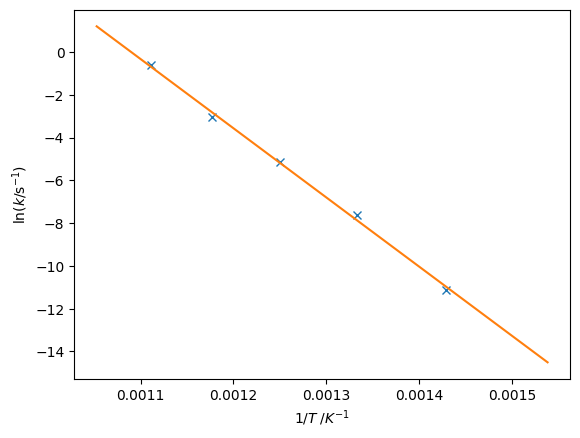

In [149]:
plt.plot(1/T,y,'x')

temperatures = np.linspace(650,950,100)
y_predicted = np.log(A)- Ea / (R*temperatures)
plt.plot(1/temperatures,y_predicted)

plt.xlabel('$1/T\;/K^{-1}$')
plt.ylabel("$\ln (k/\mathrm{s^{-1}})$")

### Numerical Integration

For example, the definite integral of $ f(x) = x^2 $ from 0 to 2 is:

$ \int_{0}^{2} x^2 \, dx $


In [150]:
from scipy.integrate import quad

def my_function(x):
    return x**2

In [151]:
integral_value, error = quad(my_function, 0 ,2)
integral_value, error

(2.666666666666667, 2.960594732333751e-14)

#### Singularities
Functions with singularities or discontinouities can cause problems in numerical integration'

$ \int_{-1}^{1} \frac{dx}{\sqrt{|1-4x^2|}} \, dx $

Due to the singularities at $x=0.5$ and $x=-0.5$ we have to split the integral

In [152]:
def my_function2(x):
    return  1 / (np.sqrt(np.abs(1-4*x**2)))

In [153]:
quad(my_function2, -1 ,1, points=(0.5,-0.5))

(2.8877542237184186, 3.632489864457966e-10)

#### Infinite integrals
Infinite integrals can be specified using `np.inf`, e.g.: 

$\int_{0}^{\infty}e^{x^2}dx = \sqrt(\pi) \approx 1.772$


In [154]:
quad(lambda x: np.exp(-(x**2)),-np.inf,np.inf)

(1.7724538509055159, 1.4202636756659625e-08)

#### Using parameters
e.g. for $\int_0^\infty e^{-a t}\cos kt \mathrm{d}t = \frac{a}{a^2+k^2}$ integrated over $t$ with parameters $a=5/2$ and $k=\pi/8$


In [155]:
def func(t,a,k):
    return np.exp(-a*t)*np.cos(k*t)
a, k = 2.5, np.pi / 8

In [156]:
quad(func,0,np.inf,args=(a,k))


(0.39036805433229327, 7.550213636289141e-11)

In [157]:
a / (a**2+k**2)

0.39036805433229327

### Van der Waals Equation 

We use the Van der Waals euqation whichon is an equation of state for real gases. It extends the ideal gas law to account for the finite size of molecules and the attractive forces between them. The equation is given by:

$$ \left( p + a \frac{n^2}{V^2} \right) (V - nb) = nRT $$

or

$$  p = \frac{nRT}{V-nb}-\frac{n^2a}{V^2} $$


where:
- $ p $ is the pressure of the gas,
- $ V $ is the volume of the gas,
- $ n $ is the number of moles of the gas,
- $ R $ is the universal gas constant,
- $ T $ is the temperature of the gas,
- $ a $ is a measure of the attraction between the particles,
- $ b $ is the volume occupied by one mole of the particles.

When the constants $ a $ and $ b $  are set to zero, the van der Waals equation reduces to the ideal gas law:

$$ PV = nRT $$

### Applications

The van der Waals equation is used to describe the behavior of real gases, especially under conditions of high pressure and low temperature where deviations from the ideal gas law are most significant.

#### References:
[van der Waals equation](https://youtu.be/NQNGpQeJuyw)



### Example
How much work is done in compressing gaseous nitrogen, initally at 1 atm, isothermally at 298K to 100 bar into a 15L scuba diving cylinder?   
Using parameters: $ a = 0.137\,m^6\,Pa\,mol^{-2}$ and  $b = 3.87\;10^{-5}\,m^3\,mol^{-1} $

First, obtain V1 and then use the following expression to obtain the work done by compression:

$$ w = - \int_{V1}^{V2} p \mathrm{d}V $$

Note that the temperature $ T = 298 \text{K}$  is constant.
- The initial pressure $ p_1 = 101325 \text{ Pa} $.  
  The initial volume $V1$ is to be determined.  
- The final pressure $ p_2 = 2 \times 10^7 \text{ Pa} $.  
- The final volume $V_2 = 15 \text{L} = 0.015 \text{ m}^3 $.  

In [158]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy.integrate import quad
from scipy.constants import R

In [159]:
# Define quantities
T = 298               # temperature in K
p1 = 101325           # initial pressure in Pa
p2, V2 = 2.e7, 1.5e-2 # final pressure in Pa and volume in m^3
a,b = 0.137, 3.87e-5  # Van der Waals parameter in SI units

In [160]:
# Lets find the number of moles at the final pressure and Volume according to the ideal gas law
n_ideal = p2*V2 / (R*T)
n_ideal # n at the final state p2 and V2, according to ideal gas law

121.07955205866718

In [161]:
# The volume of this amount of nitrogen (does not change!) at the initial conditions
V1 = n_ideal * R *T /p1
V1

2.9607698001480385

We can not solve directly for n in the case of the van der Waals equation equation, but it can be rearranged to a cubic equation in n:
$$ (ab)n^3 - (aV)n^2 + V^2(bp+RT)n-(pV^3)*1 = 0$$

which can be solved numerically (or analytically) by finding its roots. We use the numpy [Polynomial](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html) class. The individual terms of the polynomial
are specified as arguments in a list.

In [162]:
poly = Polynomial([-p2*V2**3,V2**2*(b*p2+R*T),-a*V2,a*b]) 
roots = poly.roots()
roots

array([120.28699286  +0.j        , 133.65495318-296.60961779j,
       133.65495318+296.60961779j])

This polynomial has one real and 2 imaginary roots, we can drop the imaginary solutions.

In [163]:
n = roots[0].real # n at p2 and V2 according to vdW equation: we have 120 mol of gas in total
n

np.float64(120.28699285604644)

### Work Done by a Gas Using the Van der Waals Equation

The work done by a gas during an isothermal (constant temperature) expansion or compression can be calculated using the van der Waals equation. The work $ W $ is given by the integral of pressure with respect to volume:


$ W = -\int_{V_1}^{V_2} p \, dV = -\int_{V_1}^{V_2} \left( \frac{nRT}{V - nb} - \frac{n^2a}{V^2} \right) dV $

This integral can be separated into two integrals:
$ W = -nRT \int_{V_1}^{V_2} \frac{dV}{V - nb} - n^2a \int_{V_1}^{V_2} \frac{dV}{V^2} $

The final expression for the work done by the gas during an isothermal process using the van der Waals equation is:

$  W = -nRT \ln \left( \frac{V_2 - nb}{V_1 - nb} \right) + n^2a \left( \frac{1}{V_2} - \frac{1}{V_1} \right) $ 

In [164]:
# analytical approach vdW equation
term1 = -n*R*T*np.log((V2-n*b)/(V1-n*b))
term2 = -n**2*a*(1/V2-1/V1)
work = term1 + term2
work

np.float64(1553955.912480064)

In [165]:
# compare with the analytical result for the ideal work
work_ideal = - n*R*T*np.log(V2/V1)
work_ideal # work is greate because there are not attractive forces in the ideal gas

np.float64(1575167.688541028)

In [166]:
# numerical approach for the vdW equation, integrate p = f(V) from V1 to V2 
def p(V,n,R,T,a,b):
    return n* R*T /(V- n*b)-n**2*a/(V**2)
work_numerical, err = quad(p,V2,V1, args =(n,R,T,a,b))
work_numerical # close agreement with analytical result

1553955.9124800654

In [167]:
print(f"The work done by compressing N2 into a 15L cylinder with 200 bar at 298K is {work_numerical/1000:.1f} kJ")

The work done by compressing N2 into a 15L cylinder with 200 bar at 298K is 1554.0 kJ


### Optimization

E.g. using the simple function: $f(x) = 2x^2-8x+16$

In [168]:
from scipy.optimize import minimize
def f(x):
    y = 2*x**2 -8*x +16
    return y
result = minimize(f,(0,))  # initial guess at x=2
# Print individual results
print("Optimization Results:")
print(f"Success: {result.success}")
print(f"Message: {result.message}")
print(f"Optimal Value of x: {result.x}")
print(f"Function Value at Minimum: {result.fun}")
print(f"Number of Iterations: {result.nit}")
print(f"Number of Function Evaluations: {result.nfev}")

Optimization Results:
Success: True
Message: Optimization terminated successfully.
Optimal Value of x: [2.00000002]
Function Value at Minimum: 8.0
Number of Iterations: 2
Number of Function Evaluations: 6


Text(0.5, 1.0, 'Plot of the Function $f(x) = 2x^2-8x+16$')

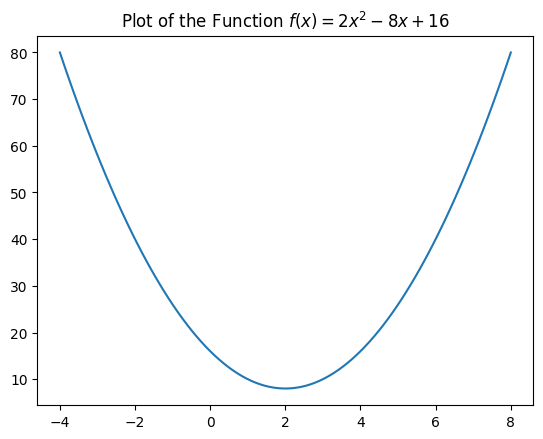

In [169]:
x = np.linspace(-4, 8,100)
plt.plot(x,f(x))   
plt.title('Plot of the Function $f(x) = 2x^2-8x+16$')

Text(0.5, 1.0, 'Plot of the Function $f(x) = 2cos(x)$')

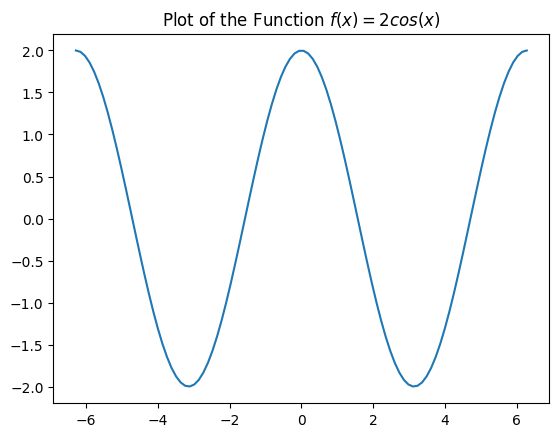

In [170]:
from scipy.constants import pi
# for a function with multiple minima things can go wrong
def f2(phi):
    return 2*np.cos(phi)
x = np.linspace(-2*pi, 2*pi,100)
plt.plot(x,f2(x))   
plt.title('Plot of the Function $f(x) = 2cos(x)$')

In [171]:
minimize(f2,(0,)) # algorithm actually stuck on a maximum!!

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0
        x: [ 0.000e+00]
      nit: 0
      jac: [-1.490e-08]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

In [172]:
minimize(f2,(1,)) # use another guess 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -2.0
        x: [ 3.142e+00]
      nit: 4
      jac: [ 0.000e+00]
 hess_inv: [[ 5.000e-01]]
     nfev: 16
     njev: 8

In [173]:
minimize(f2,(0,),method="nelder-mead") # use another method (one without relying on derivatives)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -1.999999999090761
             x: [ 3.142e+00]
           nit: 28
          nfev: 56
 final_simplex: (array([[ 3.142e+00],
                       [ 3.142e+00]]), array([-2.000e+00, -2.000e+00]))

#### Minimization with multiple variables
Consider the a function with 2 variables (multivariate), e.g.:
$f(x)=x^2-a*x-xy+b*y+4*y^2$

Note that scipy needs the variables for the minimization as a sequences (tuple or list) as first argument,
the other parameters follow hereafter:

In [174]:
def f(X,a,b):
    x,y = X # unpacking
    return x**2 - a*x -x*y+b*y+4*y**2

In [175]:
# using a = 4 and b= 10
X0 = (0,0) # initial guess as tuple: x0=0 and y0=0
res = minimize(f,X0,args=(4,10))
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8.266666666662827
        x: [ 1.467e+00 -1.067e+00]
      nit: 6
      jac: [ 3.576e-06  1.431e-06]
 hess_inv: [[ 5.419e-01  6.855e-02]
            [ 6.855e-02  1.337e-01]]
     nfev: 21
     njev: 7

In [176]:
print(f"The minimum is at (x,y) = {res.x[0]} {res.x[1]}") # x=44/30 any y = -16/15

The minimum is at (x,y) = 1.466668655328286 -1.066666236025261


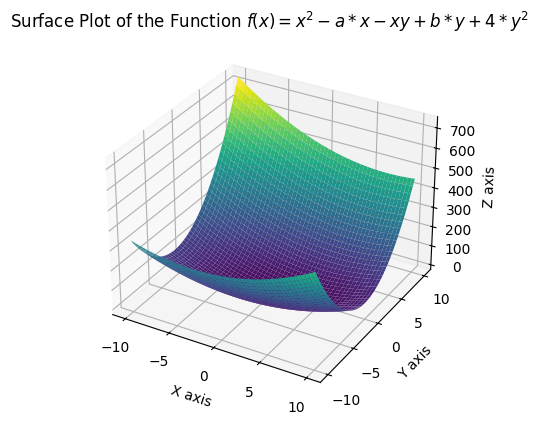

In [177]:
# Create a grid of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# Calculate Z values on the grid
Z = f((X, Y), a=4, b=10)  # You can adjust the values of a and b

# Plotting the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and a title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Surface Plot of the Function $f(x)=x^2-a*x-xy+b*y+4*y^2$')

# Show the plot
plt.show()

### Flory-Huggins Equation

The Flory-Huggins equation describes the Gibbs free energy of mixing for polymer solutions. The equation is given by:

$
\Delta G_m = RT\left( \frac{\phi_1}{n} \ln \phi_1 + \phi_2 \ln \phi_2 + \chi \phi_1 \phi_2 \right)
$

### Parameters:

- $\Delta G_m$: Gibbs free energy of mixing per mole of solution.
- $R$: Gas constant (8.314 J/mol/K).
- $T$: Temperature in Kelvin.
- $\phi_1$: Volume fraction of the polymer.
- $\phi_2$: Volume fraction of the solvent: ($\phi_2 = 1 - \phi_1$).
- $\chi$: Flory-Huggins interaction parameter.
- $n$: Number of monomer units in the polymer chain.

### Description:

The Flory-Huggins equation models the free energy change associated with mixing a polymer (with \( n \) monomer units) with a solvent. The equation takes into account the entropy of mixing, which is reduced for large polymer chains, and the enthalpic interactions between the polymer and solvent, described by the interaction parameter $chi$. The term $\frac{\phi_1}{n} \ln \phi_1$ reflects the reduced entropy of mixing for polymers compared to small molecules.

In [178]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.constants import R
import matplotlib.pyplot as plt

# Given constants
T = 298.15  # K (Room temperature)
chi = -0.5  # Flory-Huggins interaction parameter 
n = 1000  # Number of monomer units in the polymer

# Flory-Huggins free energy of mixing function
def flory_huggins(phi1):
    phi2 = 1 - phi1
    if phi1 == 0 or phi2 == 0:
        return np.inf  # Avoid log(0)
    return (R * T ) * (phi1/n * np.log(phi1) + phi2 * np.log(phi2) + chi * phi1 * phi2)

# Use minimize_scalar to find the volume fraction that minimizes the free energy
result = minimize_scalar(flory_huggins, bounds=(0, 1), method='bounded') # lets use bounds to avoid problems with ln
print(result)

# Extract the optimal volume fraction and the minimum free energy, of course this can be done analytically
phi1_opt = result.x
min_free_energy = result.fun



 message: Solution found.
 success: True
  status: 0
     fun: -1206.912722029694
       x: 0.5951891389306916
     nit: 9
    nfev: 9


The optimal volume fraction φ1 is 0.5952
The minimum Gibbs free energy of mixing is -1206.9127 J/mol


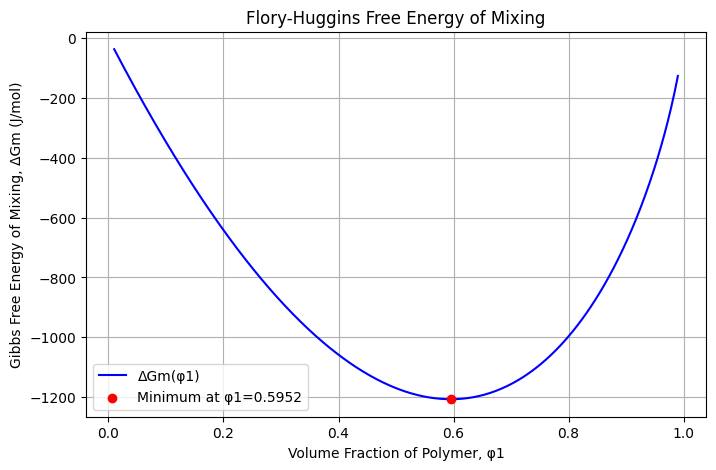

In [179]:
# Display the optimal volume fraction and minimum free energy
print(f"The optimal volume fraction φ1 is {phi1_opt:.4f}")
print(f"The minimum Gibbs free energy of mixing is {min_free_energy:.4f} J/mol")

# Plotting the free energy of mixing as a function of φ1
phi1_values = np.linspace(0.01, 0.99, 500)
free_energy_values = [flory_huggins(phi1) for phi1 in phi1_values]

plt.figure(figsize=(8, 5))
plt.plot(phi1_values, free_energy_values, label='ΔGm(φ1)', color='blue')
plt.scatter([phi1_opt], [min_free_energy], color='red', zorder=5, label=f'Minimum at φ1={phi1_opt:.4f}')
plt.xlabel('Volume Fraction of Polymer, φ1')
plt.ylabel('Gibbs Free Energy of Mixing, ΔGm (J/mol)')
plt.title('Flory-Huggins Free Energy of Mixing')
plt.legend()
plt.grid(True)
plt.show()


### Fourier Series Expansion

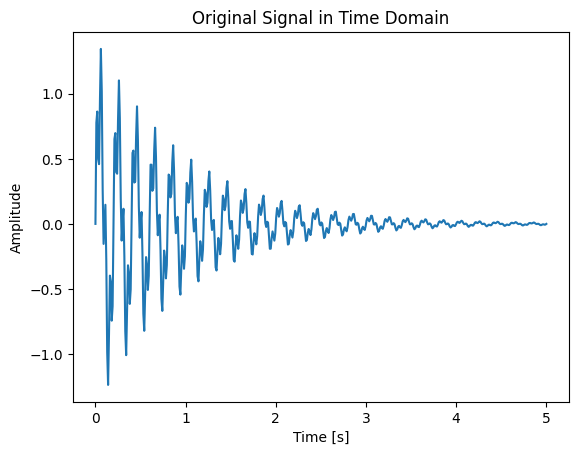

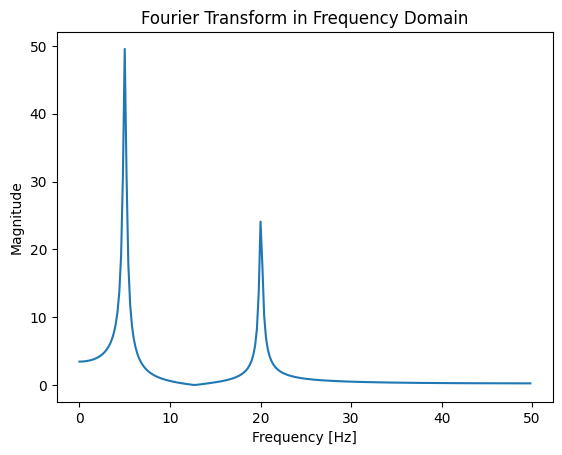

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of sample points and sample spacing
num_points = 500   # Number of points
sample_spacing = 0.01  # Time interval between samples

# Generate a time array
time = np.linspace(0.0, num_points * sample_spacing, num_points)

# Create a sample signal with two frequencies for demonstration (e.g., a mix of two sine waves)
frequency1 = 5    # 5 Hz component
frequency2 = 20   # 20 Hz component
signal = (np.sin(2 * np.pi * frequency1 * time) + 0.5 * np.sin(2 * np.pi * frequency2 * time)) * np.exp(-time)

# Perform the Fourier Transform
fft_values = np.fft.fft(signal)
frequencies = np.fft.fftfreq(num_points, sample_spacing)

# Plot the original signal
plt.figure()
plt.plot(time, signal)
plt.title("Original Signal in Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Plot the magnitude of the Fourier Transform
plt.figure()
plt.plot(frequencies[:num_points // 2], np.abs(fft_values[:num_points // 2]))  # Only plot positive frequencies
plt.title("Fourier Transform in Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()